# Data Augmentation
PyTorchのモジュールである"torchvision.transforms"で可能なデータオーギュメンテーションを全て実行し，\
それらの結果を画像として表示する\

[公式ドキュメント](https://pytorch.org/docs/stable/torchvision/transforms.html)

並び順は関数のアルファベット順で，torchvision.transforms.functionalにはこれらのrandomでないものが存在する．

In [1]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

import torchvision.transforms as tt

%matplotlib inline

In [2]:
# PIL画像を受取り，画像とそのサイズを表示する関数
def show(image):
    width,height=image.size
    print("height:{} width:{}".format(height,width))
    
    arrPIL=np.asarray(image)
    plt.imshow(arrPIL)
    plt.show()

height:640 width:512


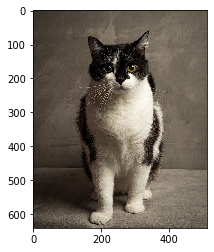

In [3]:
# 元画像の表示
path="./images/cat-4260536_640.jpg"
img=Image.open(path)
show(img)

height:200 width:300


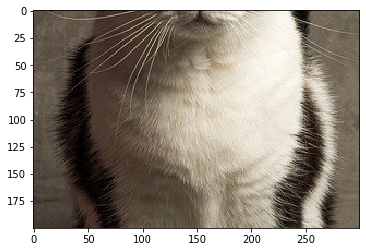

In [4]:
show(tt.CenterCrop((200,300))(img))

height:640 width:512


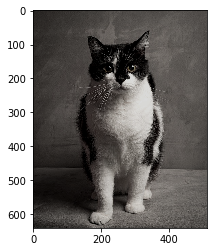

In [5]:
show(tt.ColorJitter(brightness=(0.7,1.2),contrast=(0.7,1.2),saturation=(0.3,0.7),hue=(-0.3,0.3))(img))
# 輝度，コントラスト，彩度，色相

height:200 width:300


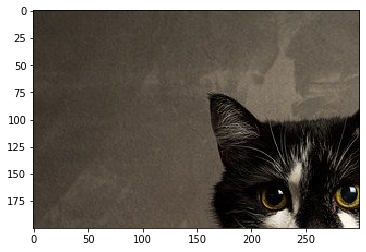

height:200 width:300


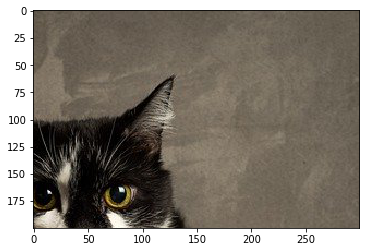

height:200 width:300


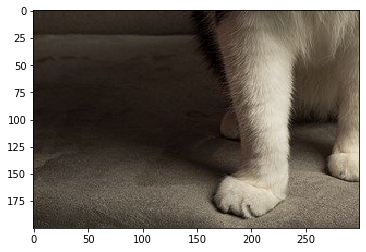

height:200 width:300


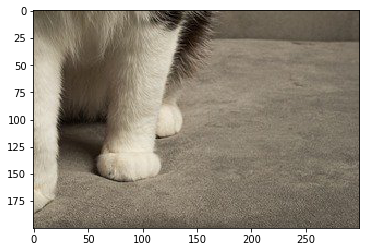

height:200 width:300


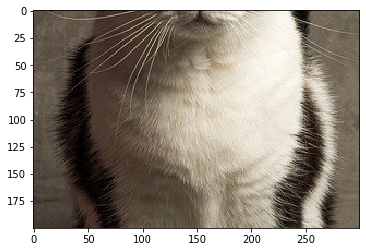

In [6]:
for i in tt.FiveCrop((200,300))(img):
    show(i)
# 画像の中央，4つの角からcrop

height:700 width:572


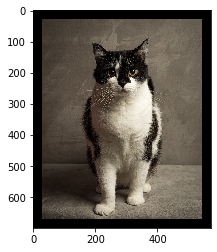

In [7]:
show(tt.Pad(padding=30,fill=0,padding_mode='constant')(img))
# 何ピクセル埋めるか(非対称にもpaddingできる)，何色で埋めるか，4つモードがある
# この場合は周り30ピクセルを0で埋めている

height:640 width:512


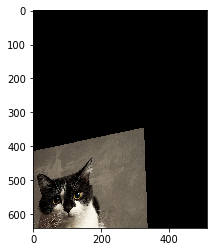

In [9]:
show(tt.RandomAffine(degrees=(-15,15),translate=(0.9,1),scale=(0.9,1.1),
                    shear=20,resample=Image.BICUBIC,fillcolor=0)(img))
# 回転，平行移動，拡大縮小，せん断(平行四辺形になる)，画素補完方法，何色で埋めるか

height:200 width:300


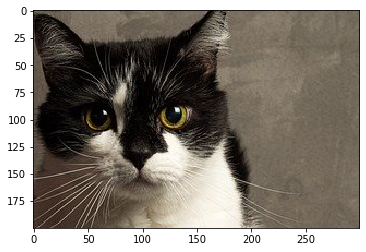

In [10]:
show(tt.RandomCrop(size=(200,300),padding=20,pad_if_needed=False,fill=0,padding_mode='constant')(img))
# pad_if_needed：元画像よりくり抜く部分が大きい時paddingするか否か,fill：何色で埋めるか
# ランダムにcropする

height:640 width:512


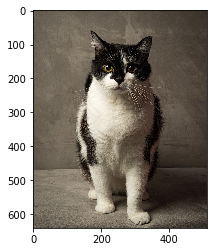

In [11]:
show(tt.RandomHorizontalFlip(p=1.0)(img))
# Horizontal Flip
# p：反転確率

height:640 width:512


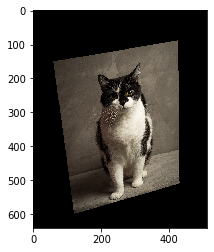

In [12]:
show(tt.RandomPerspective(distortion_scale=0.5,p=1.0,interpolation=3)(img))
# 歪度，確率，ピクセル補完方法

height:200 width:300


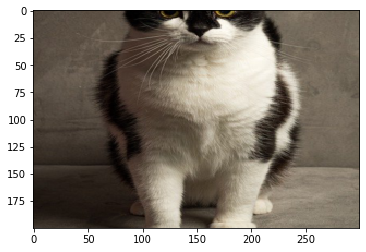

In [13]:
show(tt.RandomResizedCrop(size=(200,300),scale=(0.5,1.0),ratio=(0.75,1.33333),interpolation=2)(img))
# cropして指定されたサイズの画像にresizeする
# output size，クロップされる際の矩形の元画像に対するスケール，アスペクト比，ピクセル補完方法

height:640 width:512


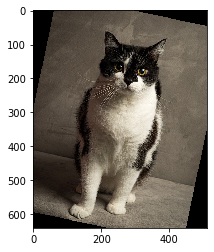

In [14]:
show(tt.RandomRotation(degrees=(-15,15),resample=Image.BICUBIC,expand=False,center=None)(img))
# expand：黒い部分がなくなるまで拡大するか，center：回転中心

height:640 width:512


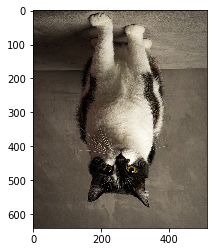

In [15]:
show(tt.RandomVerticalFlip(p=1.0)(img))

height:200 width:300


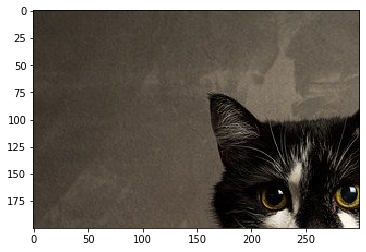

In [16]:
show(tt.TenCrop(size=(200,300),vertical_flip=True)(img)[0])
# 4隅＋中央の5個をcrop．それに加えてhorizontal(+vertical)flipされたものにも同様に5個の計10個のcropを生成

height:640 width:512


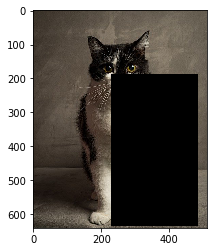

In [17]:
TensorImg=tt.ToTensor()(img.copy())
show(tt.ToPILImage()(tt.RandomErasing(p=1.0,scale=(0.2,0.5),ratio=(0.3,3.3),value=0,inplace=False)(TensorImg)))
# https://arxiv.org/pdf/1708.04896.pdfの論文で紹介されている手法